In [1]:
# Make dealing with filesystem paths much, much simpler
from pathlib import Path

# Read/write data files and data analysis
import pandas
import seaborn

import altair.vegalite.v2 as alt
# import altair as alt
alt.data_transformers.enable('csv')

import sys
sys.path.append("../src")
import figures

# Ability to plot everything
%matplotlib inline
import matplotlib.pyplot as plt

import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# Where the data files with the results are located
data_dir = Path('../data/analysis')

# Load data for most of the figures
dynamics_df = pandas.read_hdf(data_dir / 'dynamics_clean.h5', 'dynamics')
# relaxations_df = pandas.read_hdf(data_dir / 'dynamics.h5', 'relaxations')

dynamics_df = dynamics_df.query("pressure == 13.50")

# Output path for all figures
figure_dir = Path("../figures/thesis")
# Ensure the directory exists
figure_dir.mkdir(exist_ok=True)

In [3]:
dynamics_df['temp_norm'] = 0

select_high_pressure = (dynamics_df.pressure == 13.50).values
dynamics_df.loc[select_high_pressure, 'temp_norm'] = dynamics_df.loc[select_high_pressure, 'pressure'] / 1.35

select_low_pressure = (dynamics_df.pressure == 1.00).values
dynamics_df.loc[select_low_pressure, 'temp_norm'] = dynamics_df.loc[select_low_pressure, 'pressure'] / 0.36

In [4]:
groups = dynamics_df.groupby(['temperature', 'pressure', 'time'])

In [10]:
dynamics_agg = dynamics_df.groupby(['temperature', 'pressure', 'time']).agg([strap_value, strap_upper, strap_lower])

In [6]:
for index, group in groups:
    val = bs.bootstrap(group.alpha.values, bs_stats.mean)
    break

In [17]:
dynamics_agg.columns = ['_'.join(col).strip() for col in dynamics_agg.columns.values]

In [20]:
dynamics_agg = dynamics_agg.reset_index()

In [23]:
dynamics_agg.columns

Index(['temperature', 'pressure', 'time', 'alpha_strap_value',
       'alpha_strap_upper', 'alpha_strap_lower', 'com_struct_strap_value',
       'com_struct_strap_upper', 'com_struct_strap_lower', 'gamma_strap_value',
       'gamma_strap_upper', 'gamma_strap_lower',
       'mean_displacement_strap_value', 'mean_displacement_strap_upper',
       'mean_displacement_strap_lower', 'mean_rotation_strap_value',
       'mean_rotation_strap_upper', 'mean_rotation_strap_lower',
       'mfd_strap_value', 'mfd_strap_upper', 'mfd_strap_lower',
       'msd_strap_value', 'msd_strap_upper', 'msd_strap_lower',
       'overlap_strap_value', 'overlap_strap_upper', 'overlap_strap_lower',
       'rot1_strap_value', 'rot1_strap_upper', 'rot1_strap_lower',
       'rot2_strap_value', 'rot2_strap_upper', 'rot2_strap_lower',
       'scattering_function_strap_value', 'scattering_function_strap_upper',
       'scattering_function_strap_lower', 'start_index_strap_value',
       'start_index_strap_upper', 'start_i

In [21]:
import altair.vegalite.v2 as alt

In [44]:
dynamics_agg.to_hdf('../data/analysis/dynamics_agg.h5', 'dynamics')

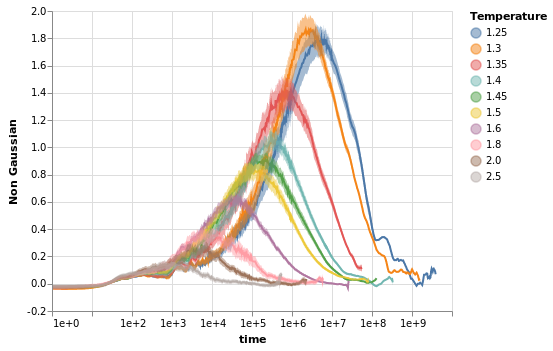

In [43]:
errorbars = alt.Chart(dynamics_agg).mark_area(opacity=0.5).encode(
    x=alt.X("time", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    y="alpha_strap_lower",
    y2="alpha_strap_upper",
    color='temperature:N',
)
line = alt.Chart(dynamics_agg).mark_line().encode(
    x=alt.X("time", scale=alt.Scale(type='log')),
    y=alt.Y("alpha_strap_value", title="Non Gaussian"),
    color=alt.Color('temperature:N', title="Temperature"),
)

line + errorbars

In [ ]:
alt.Chart.

In [7]:
def strap_value(values):
    return bs.bootstrap(values.values, bs_stats.mean, num_iterations=1000, alpha=0.01).value

def strap_lower(values):
    return bs.bootstrap(values.values, bs_stats.mean, num_iterations=1000, alpha=0.01).lower_bound

def strap_upper(values):
    return bs.bootstrap(values.values, bs_stats.mean, num_iterations=1000, alpha=0.01).upper_bound

In [36]:
group.agg([strap_value, strap_lower, strap_upper])

,alpha,com_struct,gamma,mean_displacement,mean_rotation,mfd,msd,overlap,pressure,rot1,rot2,scattering_function,start_index,struct,temperature,time,temp_norm
strap_value,-0.032178,1.0,-0.001094,0.004896,0.001727,2.205580e-09,0.000031,0.100032,13.5,0.999998,0.999991,0.999934,249.50000,1.0,1.25,1.0,10.0
strap_lower,-0.037103,1.0,-0.005993,0.004803,0.001722,1.949704e-09,0.000030,0.096935,13.5,0.999998,0.999991,0.999931,236.54980,1.0,1.25,1.0,10.0
strap_upper,-0.027154,1.0,0.003708,0.004985,0.001731,2.432061e-09,0.000033,0.103129,13.5,0.999998,0.999991,0.999937,262.39855,1.0,1.25,1.0,10.0


In [45]:
df_relax = pandas.read_hdf(data_dir / 'dynamics_clean.h5', 'molecular_relaxations')

In [46]:
df_relax

tau_D       tau_F       tau_L      tau_T2      tau_T3  \
0   0    4294967295  4294967295  4294967295  4294967295  4294967295   
    1    4294967295  4294967295  4294967295  4294967295  4294967295   
    2    4294967295  4294967295  4294967295  4294967295       89000   
    3    4294967295  4294967295  4294967295  4294967295  4294967295   
    4    4294967295  4294967295  4294967295  4294967295       78000   
    5    4294967295  4294967295  4294967295      200000      200000   
    6    4294967295  4294967295  4294967295      150000       74000   
    7    4294967295  4294967295  4294967295      200000      130000   
    8    4294967295  4294967295  4294967295  4294967295  4294967295   
    9    4294967295  4294967295  4294967295       54000       54000   
    10   4294967295  4294967295  4294967295  4294967295  4294967295   
    11   4294967295  4294967295  4294967295  4294967295  4294967295   
    12   4294967295  4294967295  4294967295  4294967295      180000   
    13   4294967295  4294967295  4294967295  4294967295  4294967295   
    14   4294967295  4294967295  4294967295  4294967295  4294967295   
    15   4294967295  4294967295  4294967295  4294967295       81000   
    16   4294967295  4294967295  4294967295  4294967295       54000   
    17   4294967295  4294967295  4294967295  4294967295       36000   
    18   4294967295  4294967295  4294967295      130000      120000   
    19   4294967295  4294967295  4294967295      110000       65000   
    20   4294967295  4294967295  4294967295       53000       21000   
    21   4294967295  4294967295  4294967295  4294967295  4294967295   
    22   4294967295  4294967295  4294967295  4294967295      170000   
    23   4294967295  4294967295  4294967295  4294967295       25000   
    24   4294967295  4294967295  4294967295  4294967295  4294967295   
    25   4294967295  4294967295  4294967295  4294967295  4294967295   
    26   4294967295  4294967295  4294967295  4294967295  4294967295   
    27   4294967295  4294967295  4294967295  4294967295  4294967295   
    28   4294967295  4294967295  4294967295      190000      170000   
    29   4294967295  4294967295  4294967295  4294967295  4294967295   
...             ...         ...         ...         ...         ...   
499 595       55000       67000  4294967295        8200        3500   
    596       55000       40000  4294967295       16000        8400   
    597      120000       35000  4294967295       29000       16000   
    598      260000       85000  4294967295       32000        8400   
    599      180000      230000  4294967295       58000       20000   
    600      130000       84000  4294967295       73000        1100   
    601      120000       14000  4294967295        7100        3100   
    602       81000      200000  4294967295      170000        7900   
    603       85000       37000  4294967295       29000       13000   
    604       43000      150000  4294967295       61000        5600   
    605       55000      160000  4294967295       27000       25000   
    606      230000       32000  4294967295       29000        4600   
    607       49000       61000  4294967295       17000        7300   
    608       53000       64000  4294967295       50000        9600   
    609       55000      120000  4294967295        5600        4000   
    610       26000       27000  4294967295       16000       16000   
    611      130000      170000  4294967295       36000       32000   
    612       82000      190000  4294967295       14000       10000   
    613      320000       43000  4294967295       40000       21000   
    614      120000      420000  4294967295       13000        6600   
    615       30000       90000  4294967295       41000       21000   
    616       55000      190000  4294967295       97000       38000   
    617       41000       31000  4294967295       29000       10000   
    618       39000       73000  4294967295       64000       11000   
    619       80000      220000  42949

In [5]:
from data_cleanup import _relax_value, _relax_lower, _relax_upper
from sdanalysis.relaxation import series_relaxation_value

In [6]:
dynamics_df.groupby(['temperature', 'pressure']).alpha.agg([_relax_value, _relax_lower, _relax_upper])

,,_relax_value,_relax_lower,_relax_upper
temperature,pressure,,,
1.45,13.5,5712.0,5698.0,5813.0
1.50,13.5,5285.0,5282.0,5355.0
2.00,13.5,3750.0,3750.0,6599.0
2.50,13.5,2203.0,2199.0,2203.0


In [9]:
pandas.read_hdf('../data/analysis/dynamics_clean_agg.h5', 'relaxations')

KeyError: 'No object named relaxations in the file'

In [ ]:
pandas.read_hdf()